{'x_min': 450, 'x_max': 1349, 'y_min': 61, 'y_max': 1041}


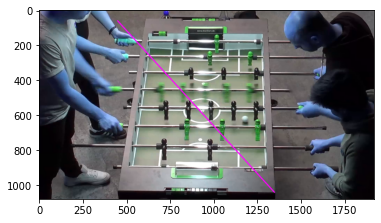

In [11]:
import cv2
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import peakutils

%matplotlib inline



img = cv2.imread('frame2.png')

mask = np.zeros(img.shape[:2], np.uint8)
edges = cv2.Canny(img, 50, 200, apertureSize=3)

def find_table(img):
    (h, w) = img.shape[0:2]
    
    #edges = cv2.Canny(img, 50, 200, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 2, np.pi/180, 300,
                            minLineLength=w/8, maxLineGap=50)
    if lines is None:
        return
    
    coords = {
        "x_min": 999999999,
        "x_max": 0,
        "y_min": 999999999,
        "y_max": 0,
    }
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        distance = math.sqrt(((x1-x2)**2)+((y1-y2)**2))
        angle = abs(np.arctan2(y2 - y1, x2 - x1) * 180. / np.pi)
        # find vertical lines
        if 80 < angle < 100:
            xmin = min(x1, x2)
            xmax = max(x1, x2)
            ymin = min(y1, y2)
            ymax = max(y1, y2)
            cv2.line(mask, (x1, y1), (x2, y2), (255), 5)
            if coords["x_min"] > xmin:
                coords["x_min"] = xmin
            if coords["x_max"] < xmax:
                coords["x_max"] = xmax
            if coords["y_min"] > ymin:
                coords["y_min"] = ymin
            if coords["y_max"] < ymax:
                coords["y_max"] = ymax
        
        # find horizontal lines
        if angle < 15:
            cv2.line(mask, (x1, y1), (x2, y2), (255), 5)
            
            
    return coords

coords = find_table(img)
print(coords)

cv2.line(img, (coords["x_min"], coords["y_min"]), (coords["x_max"], coords["y_max"]), (255, 0, 255), 5)


plt.imshow(img)

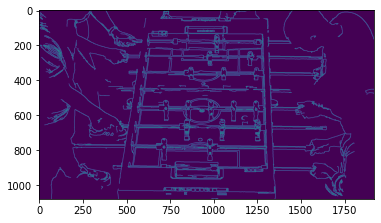

In [12]:
plt.imshow(edges)

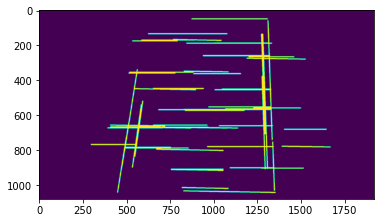

In [10]:
plt.imshow(mask)